In [ ]:
import pandas as pd
# Read the CSV file
df = pd.read_csv('real_estate.csv')

# Print the first five rows
print(df.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [ ]:
# Print out the current column names
print("Current column names:")
print(df.columns.tolist())

Current column names:
['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


In [ ]:
#Define new meaningful column names
new_column_names = {
    'No': 'ID',
    'X1 transaction date': 'Transaction_Date',
    'X2 house age': 'House_Age',
    'X3 distance to the nearest MRT station': 'Distance_to_MRT',
    'X4 number of convenience stores': 'Num_Convenience_Stores',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude',
    'Y house price of unit area': 'House_Price_Per_Unit'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

In [ ]:
# Print out the new column names
print("\nNew column names:")
print(df.columns.tolist())


New column names:
['ID', 'Transaction_Date', 'House_Age', 'Distance_to_MRT', 'Num_Convenience_Stores', 'Latitude', 'Longitude', 'House_Price_Per_Unit']


In [ ]:
# Print out the summary statistics of the variables
print(df.describe())

               ID  Transaction_Date   House_Age  Distance_to_MRT  \
count  414.000000        414.000000  414.000000       414.000000   
mean   207.500000       2013.148971   17.712560      1083.885689   
std    119.655756          0.281967   11.392485      1262.109595   
min      1.000000       2012.667000    0.000000        23.382840   
25%    104.250000       2012.917000    9.025000       289.324800   
50%    207.500000       2013.167000   16.100000       492.231300   
75%    310.750000       2013.417000   28.150000      1454.279000   
max    414.000000       2013.583000   43.800000      6488.021000   

       Num_Convenience_Stores    Latitude   Longitude  House_Price_Per_Unit  
count              414.000000  414.000000  414.000000            414.000000  
mean                 4.094203   24.969030  121.533361             37.980193  
std                  2.945562    0.012410    0.015347             13.606488  
min                  0.000000   24.932070  121.473530              7.600000

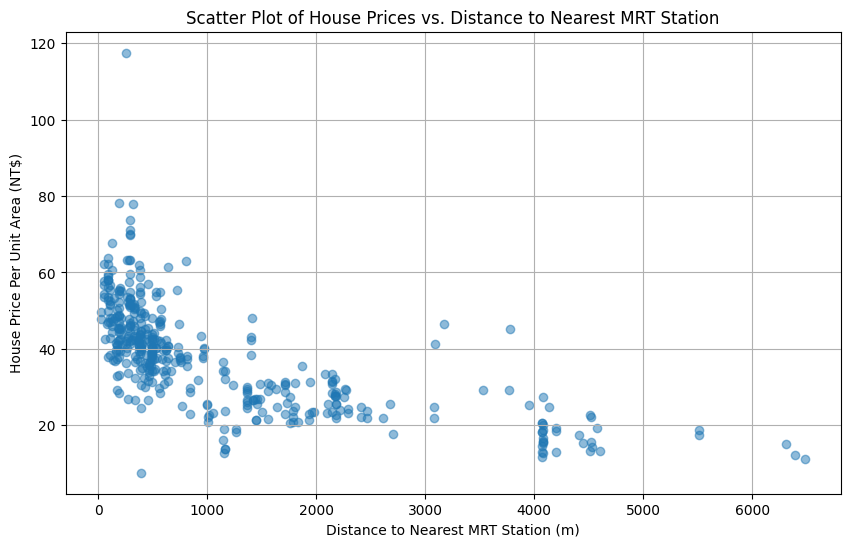

In [ ]:
import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance_to_MRT'], df['House_Price_Per_Unit'], alpha=0.5)
plt.title('Scatter Plot of House Prices vs. Distance to Nearest MRT Station')
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('House Price Per Unit Area (NT$)')
plt.grid(True)
plt.show()

Negative Correlation: The scatter plot indicates a negative correlation between house prices and the distance to the nearest MRT station. Generally, as the distance increases, house prices tend to decrease.
Proximity Premium: Properties closer to MRT stations tend to have higher prices, likely due to the convenience and accessibility offered by proximity to public transportation.
Data Variability: While there is a clear trend, there is also significant variability in prices at similar distances, suggesting that other factors also influence house prices.

Intercept: 45.8514
Coefficient for Distance_to_MRT: -0.00726205
Mean Squared Error (MSE): 100.8857
R-squared: 0.4538


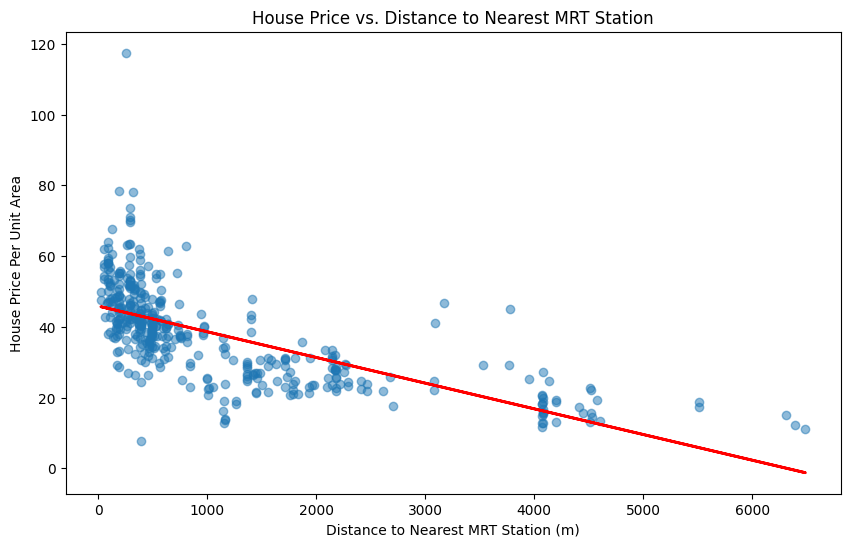

In [ ]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Prepare the data for regression
X = df[['Distance_to_MRT']].values
y = df['House_Price_Per_Unit'].values

# Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

# Print the model coefficients
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for Distance_to_MRT: {coefficient:.8f}")

# Calculate and print Mean Squared Error (MSE)
predictions = model.predict(X)
MSE = mean_squared_error(y, predictions)
print(f"Mean Squared Error (MSE): {MSE:.4f}")

# Calculate R-squared value
r_squared = r2_score(y, predictions)
print(f"R-squared: {r_squared:.4f}")

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions, color='red', linewidth=2)
plt.title('House Price vs. Distance to Nearest MRT Station')
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('House Price Per Unit Area')
plt.show()

The regression results align with the patterns observed in the scatter plot:
The negative coefficient confirms the downward trend seen in the scatter plot, where house prices tend to decrease as the distance from MRT stations increases.
The moderate R-squared value (0.4538) is reflected in the scatter plot by the considerable spread of points around the regression line. This indicates that while there is a clear trend, there's also significant variation in house prices that isn't explained solely by distance to MRT stations.
The scatter plot likely shows a more pronounced price drop for houses closer to MRT stations, with less variation in prices for houses further away. This non-linear relationship isn't captured by our simple linear model, which might explain some of the unexplained variance.

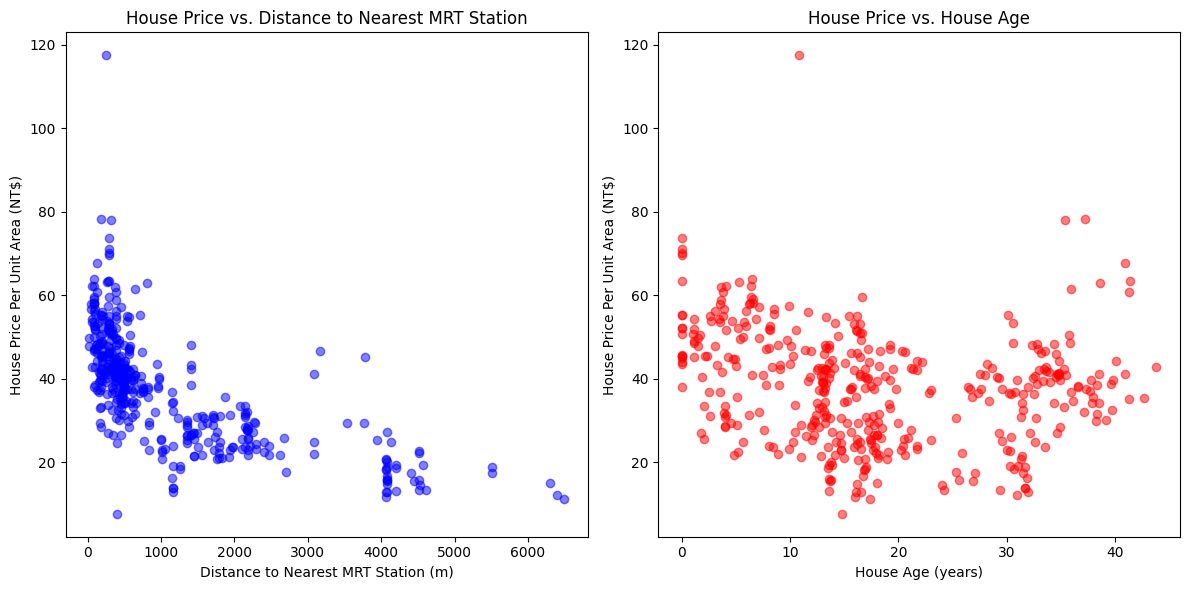

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('real_estate.csv')

# Define new column names
new_column_names = {
    'No': 'ID',
    'X1 transaction date': 'Transaction_Date',
    'X2 house age': 'House_Age',
    'X3 distance to the nearest MRT station': 'Distance_to_MRT',
    'X4 number of convenience stores': 'Num_Convenience_Stores',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude',
    'Y house price of unit area': 'House_Price_Per_Unit'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Create scatter plots
plt.figure(figsize=(12, 6))

# Plot 1: Distance to MRT vs House Price
plt.subplot(1, 2, 1)
plt.scatter(df['Distance_to_MRT'], df['House_Price_Per_Unit'], alpha=0.5, color='blue')
plt.title('House Price vs. Distance to Nearest MRT Station')
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('House Price Per Unit Area (NT$)')

# Plot 2: House Age vs House Price
plt.subplot(1, 2, 2)
plt.scatter(df['House_Age'], df['House_Price_Per_Unit'], alpha=0.5, color='red')
plt.title('House Price vs. House Age')
plt.xlabel('House Age (years)')
plt.ylabel('House Price Per Unit Area (NT$)')

# Show plots
plt.tight_layout()
plt.show()



Intercept (49.8856): This represents the predicted house price per unit area when both the distance to the nearest MRT station and the house age are zero. In practical terms, it suggests that a new house (age 0) located right at an MRT station would be expected to cost about 49.8856 units (likely in 10,000 New Taiwan Dollars) per unit area.
Coefficient for Distance_to_MRT (-0.00720862): This negative coefficient indicates an inverse relationship between distance to MRT and house price. For every 1 meter increase in distance from the nearest MRT station, the house price is expected to decrease by approximately 0.00720862 units (or 72.0862 New Taiwan Dollars per square meter), holding house age constant.
Coefficient for House_Age (-0.23102658): This negative coefficient indicates an inverse relationship between house age and price. For every 1 year increase in the age of the house, the price is expected to decrease by approximately 0.23102658 units (or 2,310.2658 New Taiwan Dollars per square meter), holding distance to MRT constant.
Mean Squared Error (MSE) (93.9798): This measures the average squared difference between the predicted and actual house prices. A lower MSE indicates better model performance.
R-squared (0.4911): This value suggests that approximately 49.11% of the variance in house prices can be explained by the distance to the nearest MRT station and the age of the house. While this indicates a moderate relationship, it also suggests that other factors not included in this model also play significant roles in determining house prices.